In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Iris.csv",index_col =0)

In [4]:
df.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa


In [5]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


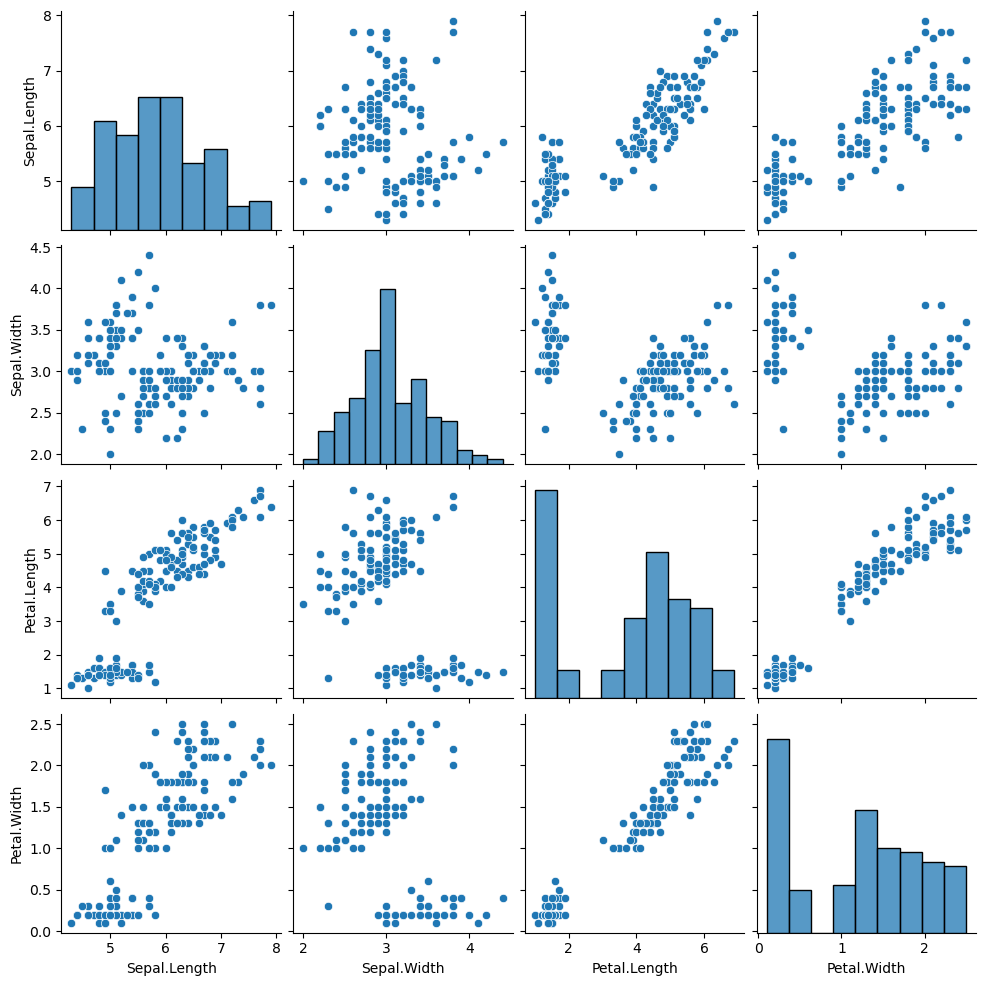

In [6]:
sns.pairplot(df)

In [7]:
df["Species"].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

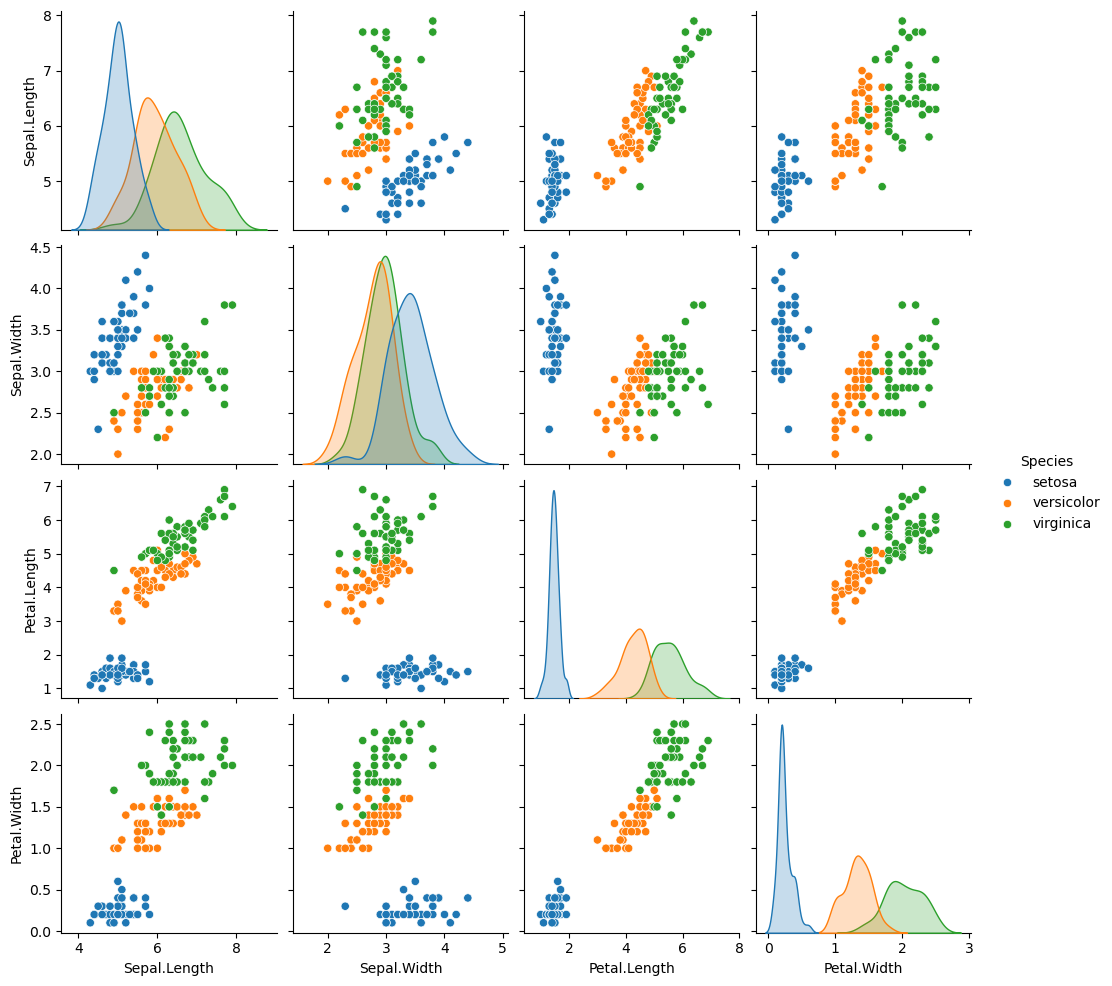

In [8]:
sns.pairplot(df,hue = 'Species')

In [9]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [11]:
from sklearn.preprocessing import LabelEncoder


In [12]:
label_encoder = LabelEncoder()

In [13]:
df.iloc[:,-1] = label_encoder.fit_transform(df["Species"])

In [15]:
df['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [16]:
from sklearn.svm import SVC

In [17]:
from sklearn.model_selection import train_test_split

In [20]:
x = df.iloc[:,0:4]

In [34]:
y = df['Species']

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

In [36]:
y_train.shape

(112,)

In [38]:
df['Species'].unique()

array([0, 1, 2], dtype=object)

In [40]:
y_train = label_encoder.fit_transform(y_train)

In [41]:
y_train

array([1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 0])

In [42]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [43]:
y_pred = svc.predict(x_test)

In [46]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [48]:
y_test = label_encoder.fit_transform(y_test)

In [50]:
print(svc.score(x_train,y_train),svc.score(x_test,y_test))
# first is the training accuracy and second is the testing accuracy

0.9642857142857143 0.9736842105263158


# hyperparameter tuning

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
params = {
    'C':[0.1,0.001,1,2,3,4,5],
    'kernel':["linear","poly",'rbf'],
    "gamma": [0.10,1,0.001,1,2,5]
}

In [53]:
grid = GridSearchCV(SVC(),param_grid =params,verbose = 1)

In [54]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 1, 2, 3, 4, 5],
                         'gamma': [0.1, 1, 0.001, 1, 2, 5],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=1)

In [56]:
grid.best_params_
# c = 0.1 and gamma = 0.1,and kernel = poly this combination gives me the best parameter

{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}

In [57]:
svc = SVC(C =0.1,gamma =0.1,kernel = 'poly')
svc.fit(x_train,y_train)


SVC(C=0.1, gamma=0.1, kernel='poly')

In [58]:
print("training accuracy of svc   :",svc.score(x_train,y_train))
print("testing accuracy of svc   :",svc.score(x_test,y_test))

training accuracy of svc   : 0.9821428571428571
testing accuracy of svc   : 0.9736842105263158


In [60]:
y_pred = svc.predict(x_test)

In [66]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])